# PREDICTING FUTURE PRODUCT PRICES USING FACEBOOK PROPHET 



# TASK 2: IMPORT LIBRARIES AND DATASET

- install fbprophet package:

   `  pip install fbprophet`
     
- If encounter an error, try: 

    `conda install -c conda-forge fbprophet`



In [151]:
# import libraries 
import pandas as pd  #  Pandas for data manipulation using dataframes
import numpy as np   #  Numpy for data statistical analysis 
import matplotlib.pyplot as plt # matplotlib for data visualisation
import random
import seaborn as sns
from fbprophet import Prophet
from fbprophet.plot import plot

In [4]:
# dataframes creation for both training and testing datasets 
df_avocado=pd.read_csv("https://raw.githubusercontent.com/tsheng0315/Projects-on-CV/main/Predict%20Future%20Product%20Prices%20using%20Facebook%20Prophet/data/avocado.csv")


- Date: The date of the observation
- AveragePrice: the average price of a single avocado
- type: conventional or organic
- year: the year
- Region: the city or region of the observation
- Total Volume: Total number of avocados sold
- 4046: Total number of avocados with PLU 4046 sold
- 4225: Total number of avocados with PLU 4225 sold
- 4770: Total number of avocados with PLU 4770 sold

In [5]:
# Let's view the head of the training dataset
df_avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
# Let's view the last elements in the training dataset
df_avocado.tail(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18239,2,2018-03-11,1.56,22128.42,2162.67,3194.25,8.93,16762.57,16510.32,252.25,0.0,organic,2018,WestTexNewMexico
18240,3,2018-03-04,1.54,17393.30,1832.24,1905.57,0.00,13655.49,13401.93,253.56,0.0,organic,2018,WestTexNewMexico
18241,4,2018-02-25,1.57,18421.24,1974.26,2482.65,0.00,13964.33,13698.27,266.06,0.0,organic,2018,WestTexNewMexico
18242,5,2018-02-18,1.56,17597.12,1892.05,1928.36,0.00,13776.71,13553.53,223.18,0.0,organic,2018,WestTexNewMexico
18243,6,2018-02-11,1.57,15986.17,1924.28,1368.32,0.00,12693.57,12437.35,256.22,0.0,organic,2018,WestTexNewMexico
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [7]:
df_avocado.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [9]:
df_avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [10]:
# check the existence of null element in table
df_avocado.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

# TASK #3: EXPLORE DATASET  

In [20]:
# sort the records according to data
df_avocado.sort_values('Date',inplace=True)

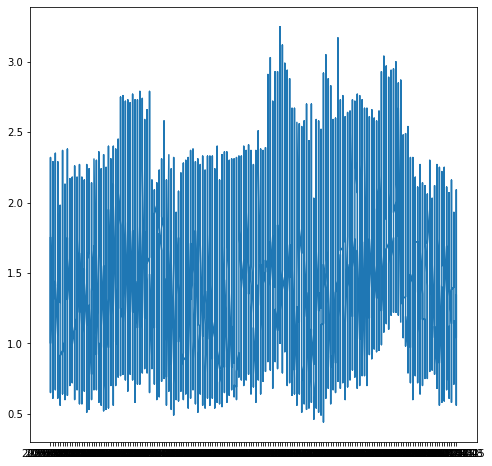

In [76]:
# Plot date and average price
plt.figure(figsize=(8,8))
plt.plot(df_avocado['Date'], df_avocado['AveragePrice'])
plt.show()

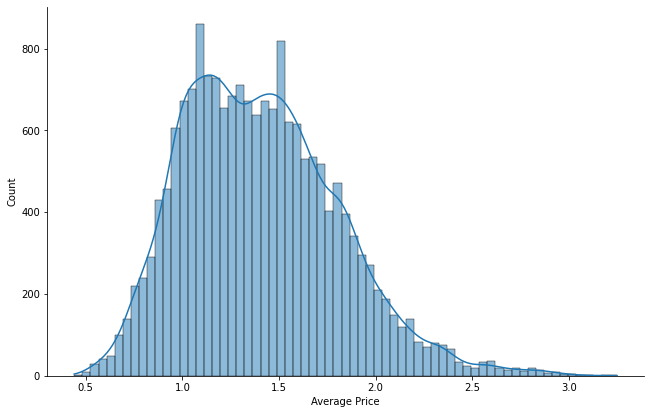

In [75]:
# Plot distribution of the average price
# plt.figure(figsize=(10,17)).show()
# plt.figure(figsize=(15,8))

g=sns.displot(data=df_avocado,x="AveragePrice",kde=True)
g.set_axis_labels("Average Price", "Count")
g.set_titles("penguins")
g.fig.set_size_inches(10,6)
plt.show()

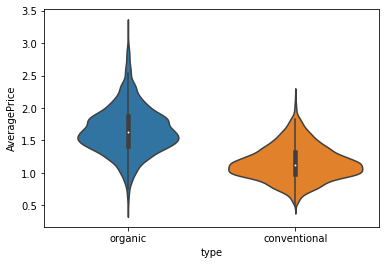

In [84]:
# Plot a violin plot of the average price vs. avocado type
g=sns.violinplot(data=df_avocado,x='type',y="AveragePrice")
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text major ticklabel objects>)

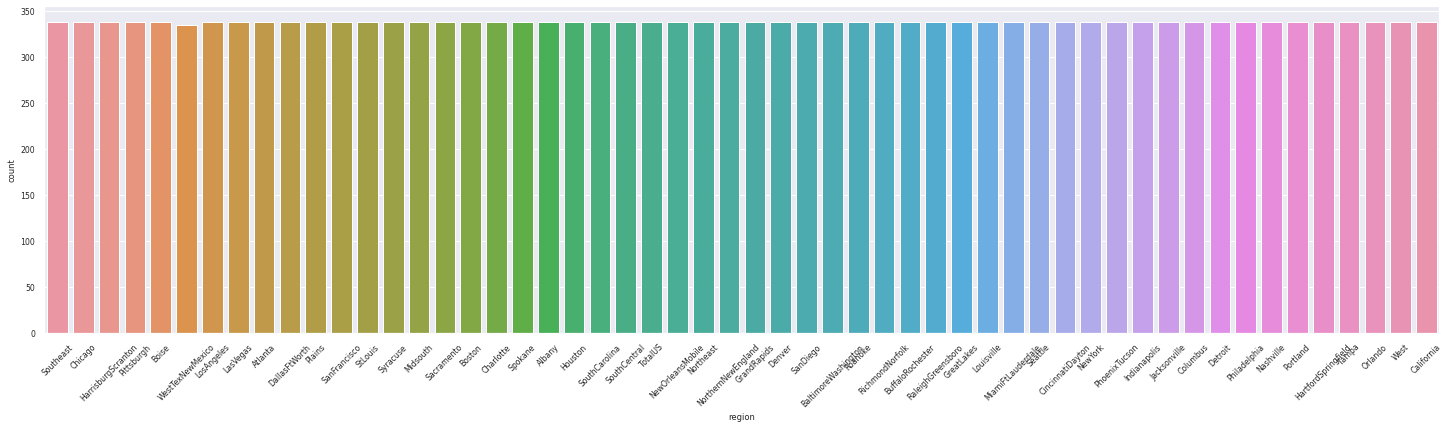

In [92]:
# Bar Chart to indicate the number of regions 

sns.set(font_scale=0.7) 
plt.figure(figsize=[25,6])
sns.countplot(x = 'region', data = df_avocado)
plt.xticks(rotation = 45)


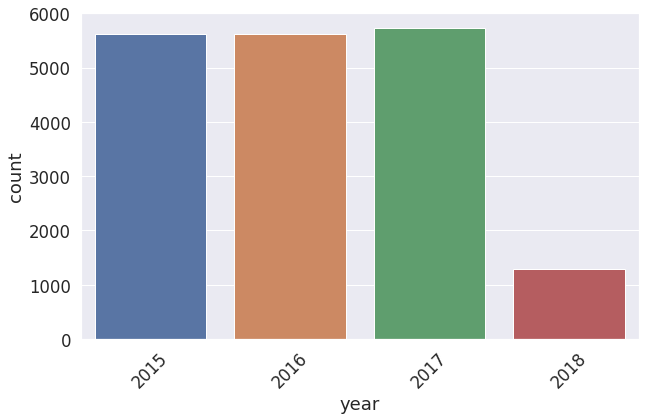

In [98]:
# Bar Chart to indicate the count in every year to see whether data equally recorded among years or not
sns.set(font_scale=1.5) 
plt.figure(figsize=[10,6])
sns.countplot(x = 'year', data = df_avocado)
plt.xticks(rotation = 45)
plt.show()


In [115]:
df_avocado['type']=='conventional'

11569    False
9593     False
10009    False
1819      True
9333     False
         ...  
8574      True
9018      True
17625    False
18033    False
8814      True
Name: type, Length: 18249, dtype: bool

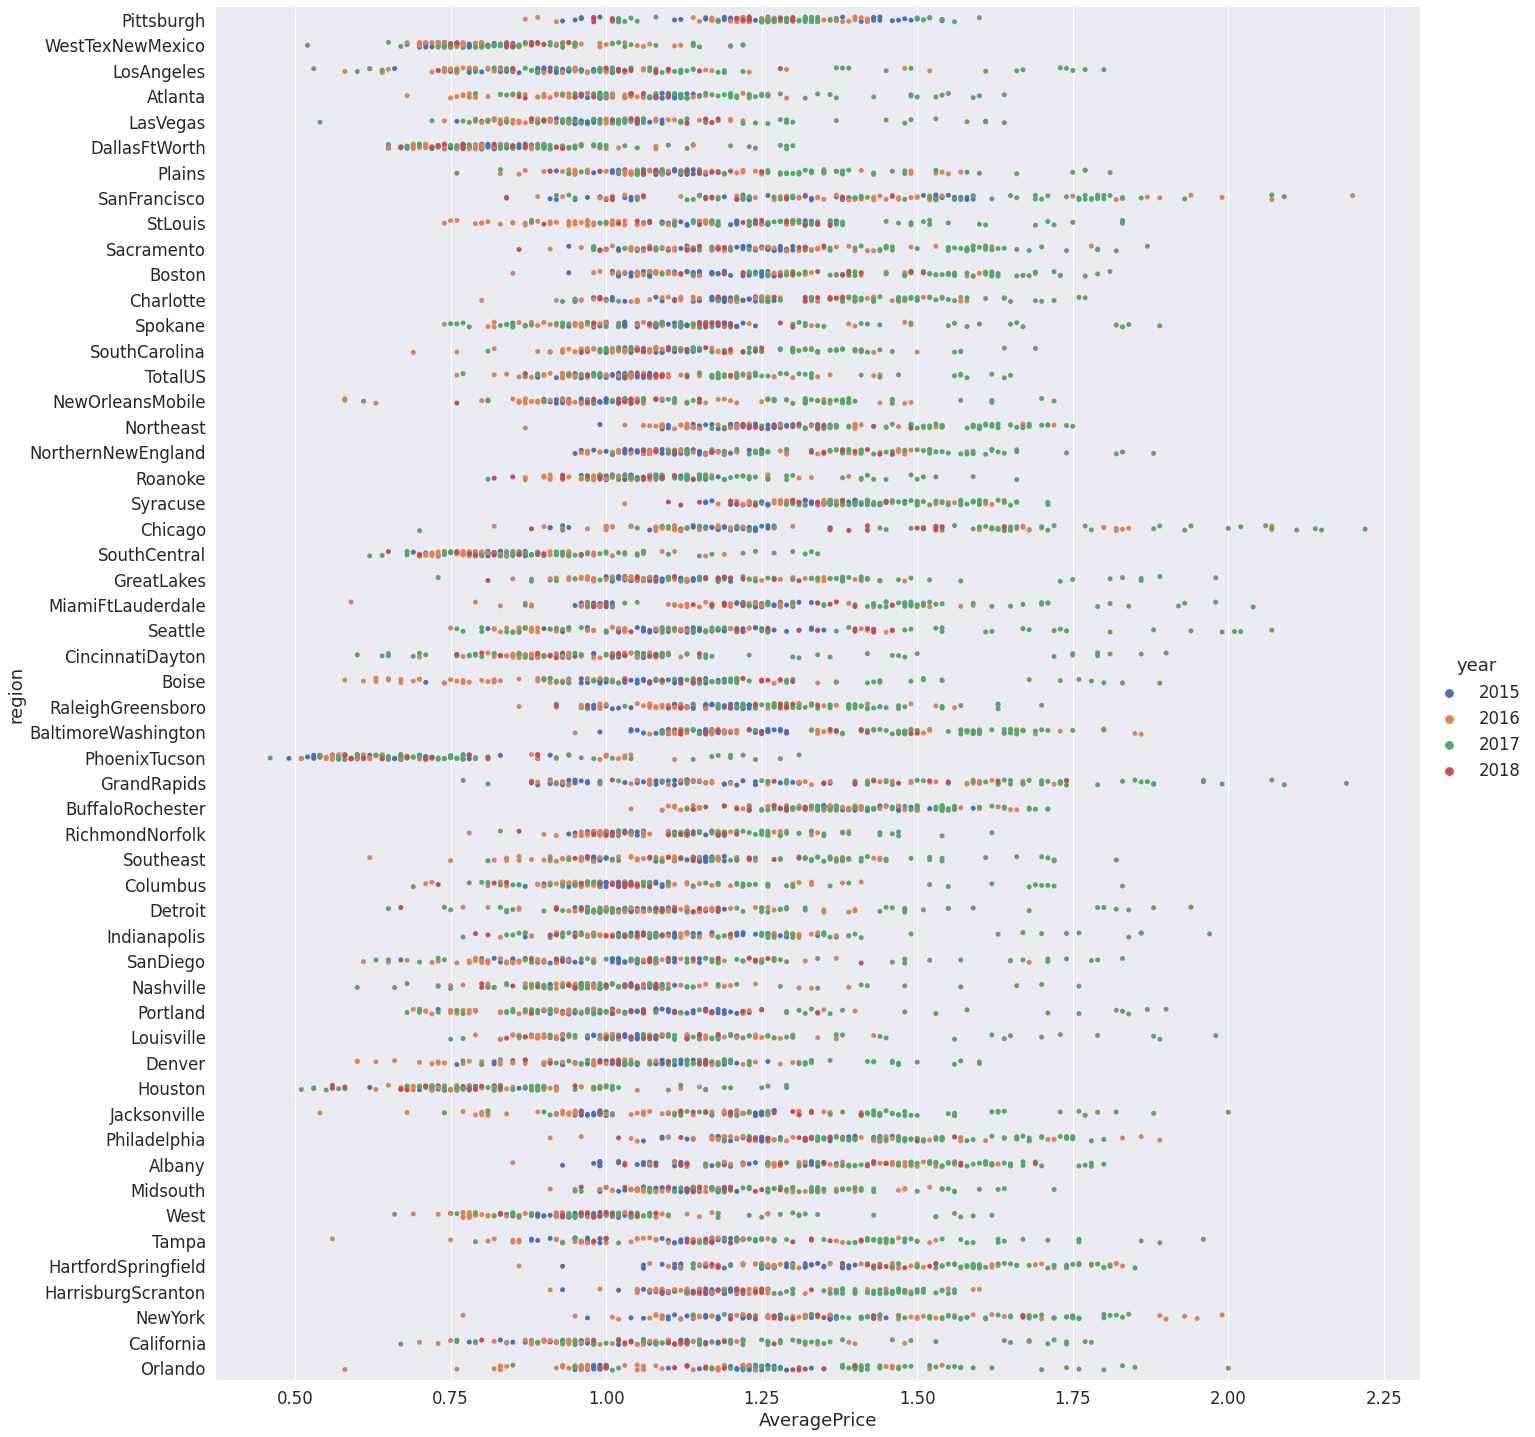

In [114]:
# plot the avocado prices vs. regions for conventional avocados
conventional=sns.catplot(x='AveragePrice', y='region',hue='year',data=df_avocado[df_avocado['type']=='conventional'],height=20,legend=True)

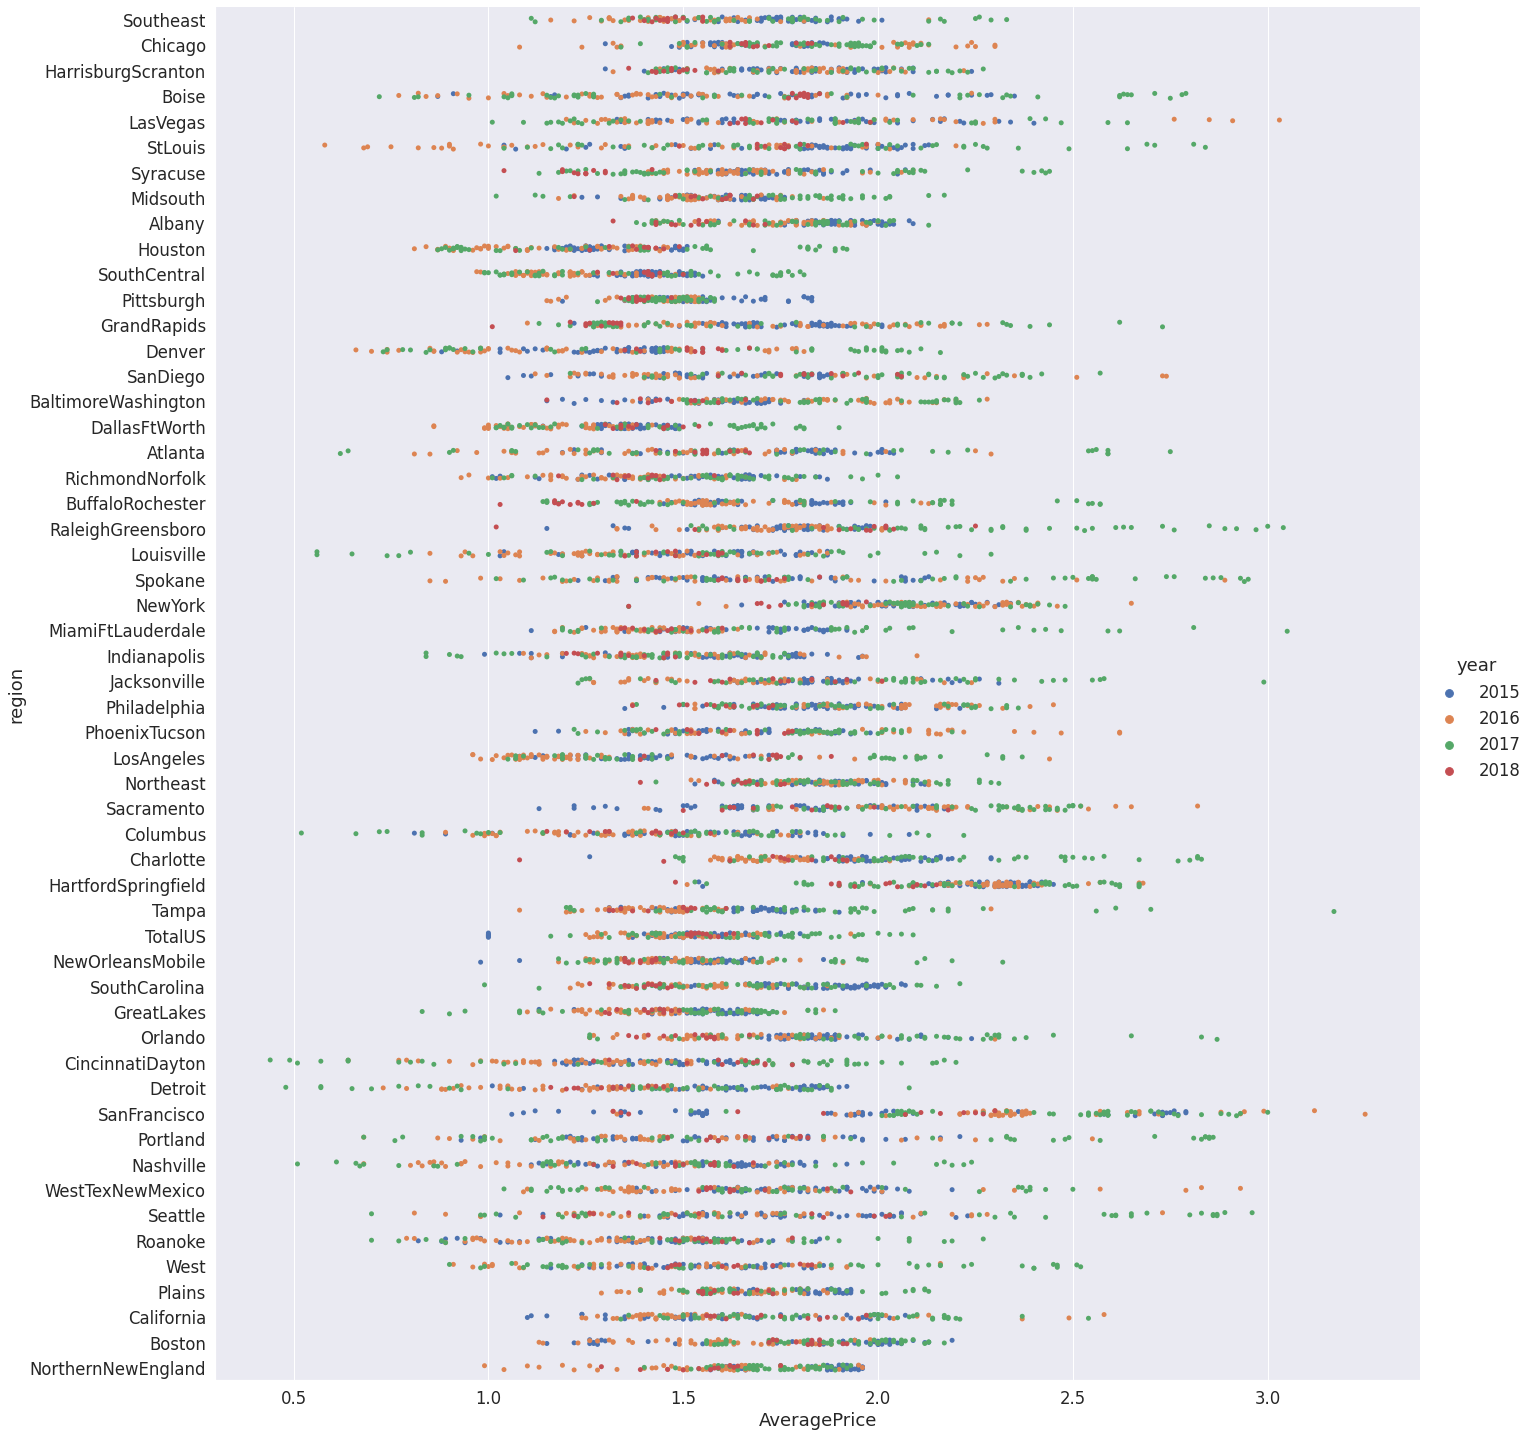

In [116]:
  # plot the avocado prices vs. regions for organic avocados

conventional=sns.catplot(x='AveragePrice', y='region',hue='year',data=df_avocado[df_avocado['type']=='organic'],height=20,legend=True)

# TASK 4: PREPARE THE DATA BEFORE APPLYING FACEBOOK PROPHET TOOL 

In [117]:
df_avocado

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
9018,0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
17625,0,2018-03-25,1.33,57606.42,2002.40,5548.18,82.68,49973.16,49957.61,15.55,0.00,organic,2018,BaltimoreWashington
18033,0,2018-03-25,1.66,31275.39,1746.29,8110.67,0.00,21418.43,1712.10,19700.47,5.86,organic,2018,Portland


In [131]:
df_avocado_prophet=df_avocado[['Date','AveragePrice']]
df_avocado_prophet

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
17625,2018-03-25,1.33
18033,2018-03-25,1.66


In [123]:
type(df_avocado['Date'])

pandas.core.series.Series

In [132]:
df_avocado_prophet=df_avocado_prophet.rename(columns={'Date':'ds','AveragePrice':'y'})
df_avocado_prophet

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
17625,2018-03-25,1.33
18033,2018-03-25,1.66


# TASK 5: UNDERSTAND INTUITION BEHIND FACEBOOK PROPHET

# TASK 6: DEVELOP MODEL AND MAKE PREDICTIONS - PART A

In [133]:
# fit model with trainning data
m=Prophet()
m.fit(df_avocado_prophet)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [136]:
# Forcasting into the future
# By default it will also include the dates from the history, so we will see the model fit as well.
future=m.make_future_dataframe(periods=365)
future

,ds
0,2015-01-04
1,2015-01-11
2,2015-01-18
3,2015-01-25
4,2015-02-01
...,...
529,2019-03-21
530,2019-03-22
531,2019-03-23
532,2019-03-24


In [138]:
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.499415,0.907784,1.889598,1.499415,1.499415,-0.114791,-0.114791,-0.114791,-0.114791,-0.114791,-0.114791,0.0,0.0,0.0,1.384623
1,2015-01-11,1.494200,0.903484,1.857509,1.494200,1.494200,-0.106445,-0.106445,-0.106445,-0.106445,-0.106445,-0.106445,0.0,0.0,0.0,1.387755
2,2015-01-18,1.488984,0.872725,1.905345,1.488984,1.488984,-0.106191,-0.106191,-0.106191,-0.106191,-0.106191,-0.106191,0.0,0.0,0.0,1.382793
3,2015-01-25,1.483769,0.879818,1.871183,1.483769,1.483769,-0.125212,-0.125212,-0.125212,-0.125212,-0.125212,-0.125212,0.0,0.0,0.0,1.358557
4,2015-02-01,1.478554,0.836868,1.819267,1.478554,1.478554,-0.153622,-0.153622,-0.153622,-0.153622,-0.153622,-0.153622,0.0,0.0,0.0,1.324932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.172858,0.561969,1.571162,0.981531,1.354958,-0.087429,-0.087429,-0.087429,-0.087429,-0.087429,-0.087429,0.0,0.0,0.0,1.085429
530,2019-03-22,1.172149,0.539960,1.604292,0.979844,1.354882,-0.085713,-0.085713,-0.085713,-0.085713,-0.085713,-0.085713,0.0,0.0,0.0,1.086435
531,2019-03-23,1.171440,0.583281,1.612100,0.978157,1.354788,-0.083722,-0.083722,-0.083722,-0.083722,-0.083722,-0.083722,0.0,0.0,0.0,1.087718
532,2019-03-24,1.170731,0.563804,1.608718,0.976476,1.354784,-0.081474,-0.081474,-0.081474,-0.081474,-0.081474,-0.081474,0.0,0.0,0.0,1.089257


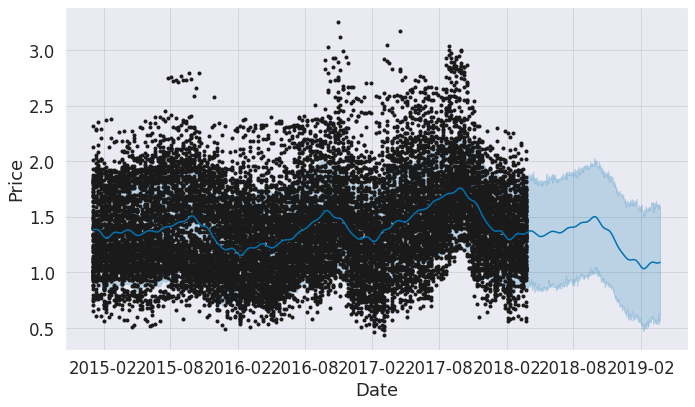

In [139]:
fig=m.plot(forecast,xlabel='Date',ylabel='Price')

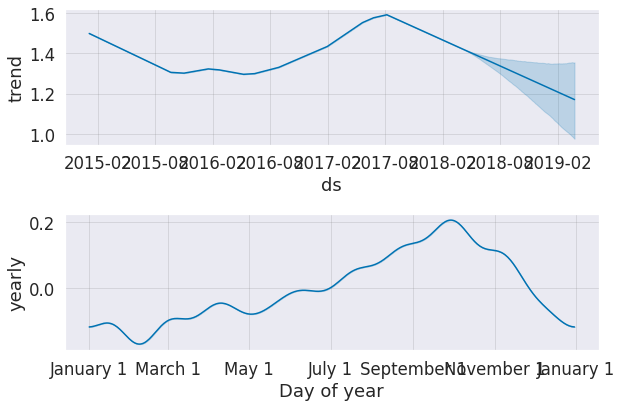

In [156]:
fig2=m.plot_components(forecast)


# TASK 7: DEVELOP MODEL AND MAKE PREDICTIONS (REGION SPECIFIC) - PART B

In [158]:
# dataframes creation for both training and testing datasets 
df_avocado

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
9018,0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
17625,0,2018-03-25,1.33,57606.42,2002.40,5548.18,82.68,49973.16,49957.61,15.55,0.00,organic,2018,BaltimoreWashington
18033,0,2018-03-25,1.66,31275.39,1746.29,8110.67,0.00,21418.43,1712.10,19700.47,5.86,organic,2018,Portland


In [165]:
# Select specific region
df_avocado_west=df_avocado[df_avocado['region']=='West']

In [166]:
df_avocado_west=df_avocado_west.sort_values('Date')

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


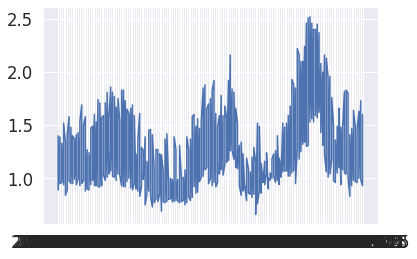

In [163]:
# plot to give a general idea of what the trend is. 
plt.plot(df_avocado_west['Date'],df_avocado_west['AveragePrice'])

In [167]:
df_avocado_west=df_avocado_west.rename(columns={'Date':'ds','AveragePrice':'y'})
df_avocado_west

,Unnamed: 0,ds,y,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
2753,49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9104,2,2018-03-11,1.00,6906412.50,2442241.76,1695925.97,130983.00,2637261.77,1435608.59,1184730.56,16922.62,conventional,2018,West
18226,1,2018-03-18,1.73,210067.47,33437.98,47165.54,110.40,129353.55,73163.12,56020.24,170.19,organic,2018,West
9103,1,2018-03-18,0.99,7254940.65,2099082.66,1707752.84,115997.93,3332107.22,1333247.05,1982086.02,16774.15,conventional,2018,West
9102,0,2018-03-25,0.93,7667064.46,2567279.74,1912986.38,118289.91,3068508.43,1309580.19,1745630.06,13298.18,conventional,2018,West


In [169]:
m = Prophet()
m.fit(df_avocado_west)
# Forcasting into the future
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


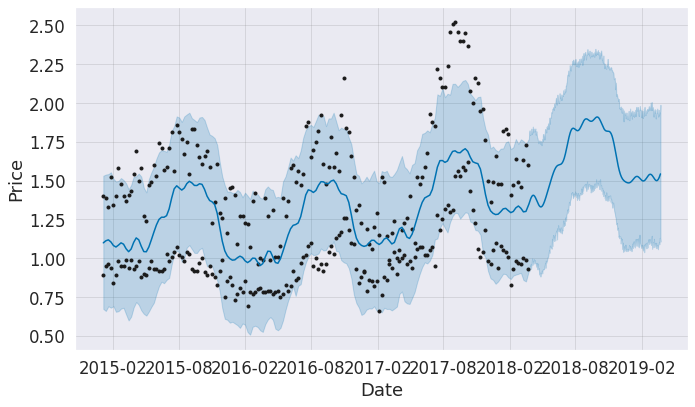

In [170]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')
# the price will actually go up here in west of US

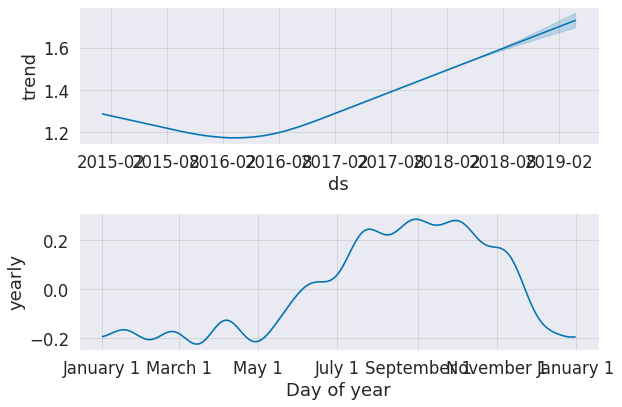

In [171]:
figure3 = m.plot_components(forecast)